In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
import missingno as msno 
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Загружаем и предобрабатываем данные:

In [31]:
cd '/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары'

/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары


In [32]:
data = pd.read_csv(r'./credit_data.csv',delimiter=',')
data.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [33]:
data.Risk.value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [34]:
data.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

## Удалим столбцы не несущие какой-либо полезной информации, а также вынесем метки строк в отдельный массив target:

In [35]:
target = data['Risk']
data = data.drop(['Risk','Unnamed: 0', 'Purpose'], axis=1)

## Заменим текстовые категориальные признаки на числовые с помощью функции map. Пустые значения в столбцах заменим на 0.

In [36]:
data['Saving accounts'] = data['Saving accounts'].map({"little":1,"moderate":2,"quite rich":3 ,"rich":4 });
data['Checking account'] = data['Checking account'].map({"little":1,"moderate":2,"rich":3 });
target = target.map({"good":1,"bad":0});
data['Saving accounts'] = data['Saving accounts'].fillna(0)
data['Checking account'] = data['Checking account'].fillna(0)

In [37]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,male,2,own,0.0,1.0,1169,6
1,22,female,2,own,1.0,2.0,5951,48
2,49,male,1,own,1.0,0.0,2096,12
3,45,male,2,free,1.0,1.0,7882,42
4,53,male,2,free,1.0,1.0,4870,24


Выведите информацию о количественных параметрах датасета

In [38]:
data.select_dtypes(include=np.number).head(5)

,Age,Job,Saving accounts,Checking account,Credit amount,Duration
0,67,2,0.0,1.0,1169,6
1,22,2,1.0,2.0,5951,48
2,49,1,1.0,0.0,2096,12
3,45,2,1.0,1.0,7882,42
4,53,2,1.0,1.0,4870,24


In [39]:
data.describe()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,1.190000,1.001000,3271.258000,20.903000
std,11.375469,0.653614,0.966869,0.957034,2822.736876,12.058814
min,19.000000,0.000000,0.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1.000000,0.000000,1365.500000,12.000000
50%,33.000000,2.000000,1.000000,1.000000,2319.500000,18.000000
75%,42.000000,2.000000,1.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,4.000000,3.000000,18424.000000,72.000000


# Задания для выполнения:

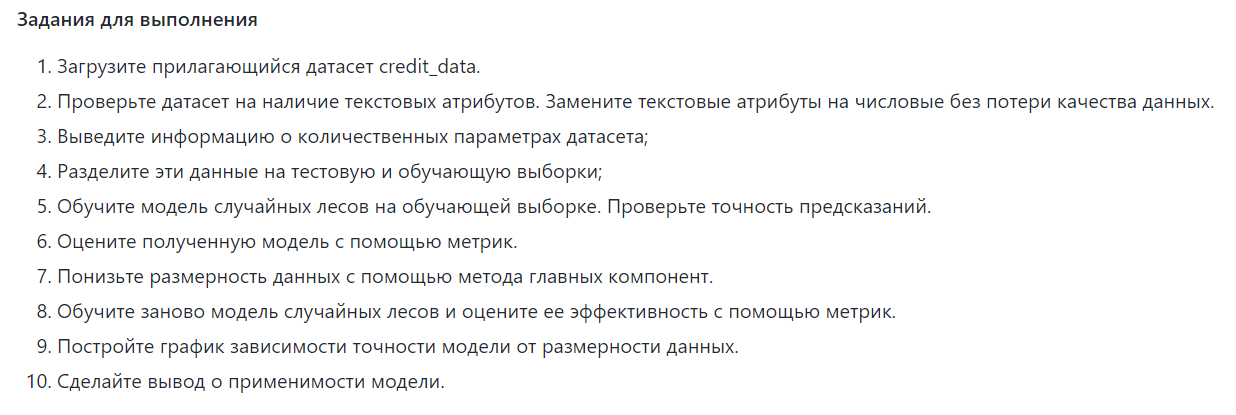

## Заменим полученные категориальные признаки на индикаторы с помощью метода get_dummies. Это необходимо поскольку модель случайных лесов плохо работает с категориальными признаками, но неплохо обучается с индикаторами

In [40]:
new_data = pd.get_dummies(data)
new_data.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent
0,67,2,0.0,1.0,1169,6,0,1,0,1,0
1,22,2,1.0,2.0,5951,48,1,0,0,1,0
2,49,1,1.0,0.0,2096,12,0,1,0,1,0
3,45,2,1.0,1.0,7882,42,0,1,1,0,0
4,53,2,1.0,1.0,4870,24,0,1,1,0,0


## Нормализуем данные и понизим размерность данных до 2-х атрибутов.

In [41]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

y = KMeans().fit_predict(new_data)
X = normalize(new_data);
x_PCA = PCA(n_components=2).fit_transform(X,2);
print(x_PCA.shape)

(1000, 2)


## Построим график на основе полученных атрибутов:

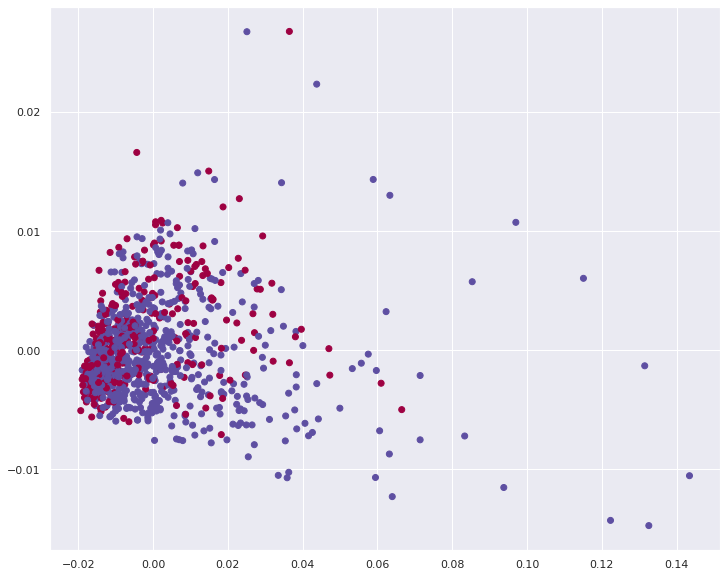

In [42]:
plt.figure(figsize=(12,10))
plt.scatter(x_PCA[:,0], x_PCA[:,1], c=target, cmap='Spectral');

## Разделим эти данные на тестовую и обучающую выборки

In [44]:
target

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

In [74]:
x_train, x_test, y_train, y_test = train_test_split(new_data, target, 
                                                    test_size=0.25,
                                                    random_state=True)

## Обучите модель случайных лесов на обучающей выборке. Проверьте точность предсказаний.

In [75]:
df_differences = pd.DataFrame(columns=['Тип модели классификации', 'Accuracy_score', 'Precision_score', 'Recall_score', 'F1_score', 'Время обучения'])

In [76]:
# Определяем методы
learning_models = {
    "RandomForestClassifier": RandomForestClassifier()
}

# Построим график ROC-кривой
#plt.figure(figsize=(11.5, 7), dpi=100)

y_test_predict = dict()
i = 0
for name, model in learning_models.items():
    start_time = time.time()
    model.fit(x_train, y_train)
    y_score = model.predict_proba(x_test)[:, 1]
    t = time.time() - start_time
                 
    y_test_predict[name] = model.predict(x_test)
    df_differences.loc[i] = [name,
                         accuracy_score(y_test, model.predict(x_test)),
                         precision_score(y_test, model.predict(x_test), average='macro'),
                         recall_score(y_test, model.predict(x_test), average='macro'),
                         f1_score(y_test, model.predict(x_test), average='macro'),t]
    
    i += 1

In [77]:
df_differences

,Тип модели классификации,Accuracy_score,Precision_score,Recall_score,F1_score,Время обучения
0,RandomForestClassifier,0.748,0.695881,0.652641,0.664,0.240909


## Понизьте размерность данных с помощью метода главных компонент. Обучите заново модель случайных лесов и оцените ее эффективность с помощью метрик.

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_PCA, target, 
                                                    test_size=0.25,
                                                    random_state=True)

In [79]:
# Определяем методы
learning_models = {
    "RandomForestClassifier": RandomForestClassifier()
}

# Построим график ROC-кривой
#plt.figure(figsize=(11.5, 7), dpi=100)

y_test_predict = dict()
for name, model in learning_models.items():
    start_time = time.time()
    model.fit(x_train, y_train)
    y_score = model.predict_proba(x_test)[:, 1]
    t = time.time() - start_time
                 
    y_test_predict[name] = model.predict(x_test)
    df_differences.loc[i] = [name,
                         accuracy_score(y_test, model.predict(x_test)),
                         precision_score(y_test, model.predict(x_test), average='macro'),
                         recall_score(y_test, model.predict(x_test), average='macro'),
                         f1_score(y_test, model.predict(x_test), average='macro'),t]
    
    i += 1

In [80]:
df_differences

,Тип модели классификации,Accuracy_score,Precision_score,Recall_score,F1_score,Время обучения
0,RandomForestClassifier,0.748,0.695881,0.652641,0.664000,0.240909
1,RandomForestClassifier,0.656,0.536745,0.524647,0.517331,0.231287


In [85]:
df_differences = pd.DataFrame(columns=['Тип модели классификации', 'Accuracy_score', 'Precision_score', 'Recall_score', 'F1_score', 'Время обучения', 'Размерность (n)'])
i = 0

for n in range(2, 11):
  x_PCA = PCA(n_components=n).fit_transform(X,2);
  x_train, x_test, y_train, y_test = train_test_split(x_PCA, target, 
                                                    test_size=0.25,
                                                    random_state=True)
  # Определяем методы
  learning_models = {
      "RandomForestClassifier": RandomForestClassifier()
  }

  # Построим график ROC-кривой
  #plt.figure(figsize=(11.5, 7), dpi=100)

  y_test_predict = dict()
  for name, model in learning_models.items():
      start_time = time.time()
      model.fit(x_train, y_train)
      y_score = model.predict_proba(x_test)[:, 1]
      t = time.time() - start_time
                  
      y_test_predict[name] = model.predict(x_test)
      df_differences.loc[i] = [name,
                          accuracy_score(y_test, model.predict(x_test)),
                          precision_score(y_test, model.predict(x_test), average='macro'),
                          recall_score(y_test, model.predict(x_test), average='macro'),
                          f1_score(y_test, model.predict(x_test), average='macro'),t, n]
      
      i += 1

In [86]:
df_differences 

,Тип модели классификации,Accuracy_score,Precision_score,Recall_score,F1_score,Время обучения,Размерность (n)
0,RandomForestClassifier,0.644,0.531678,0.523956,0.520174,0.256727,2
1,RandomForestClassifier,0.696,0.609996,0.576551,0.578490,0.252723,3
2,RandomForestClassifier,0.660,0.575288,0.566646,0.568747,0.292397,4
3,RandomForestClassifier,0.716,0.646615,0.614251,0.621333,0.556237,5
4,RandomForestClassifier,0.712,0.636905,0.591830,0.595905,0.595150,6
5,RandomForestClassifier,0.752,0.708448,0.639819,0.652029,0.407442,7
6,RandomForestClassifier,0.724,0.658478,0.604269,0.610390,0.834248,8
7,RandomForestClassifier,0.736,0.678950,0.624539,0.633952,0.537480,9
8,RandomForestClassifier,0.740,0.689209,0.619549,0.628410,0.457407,10


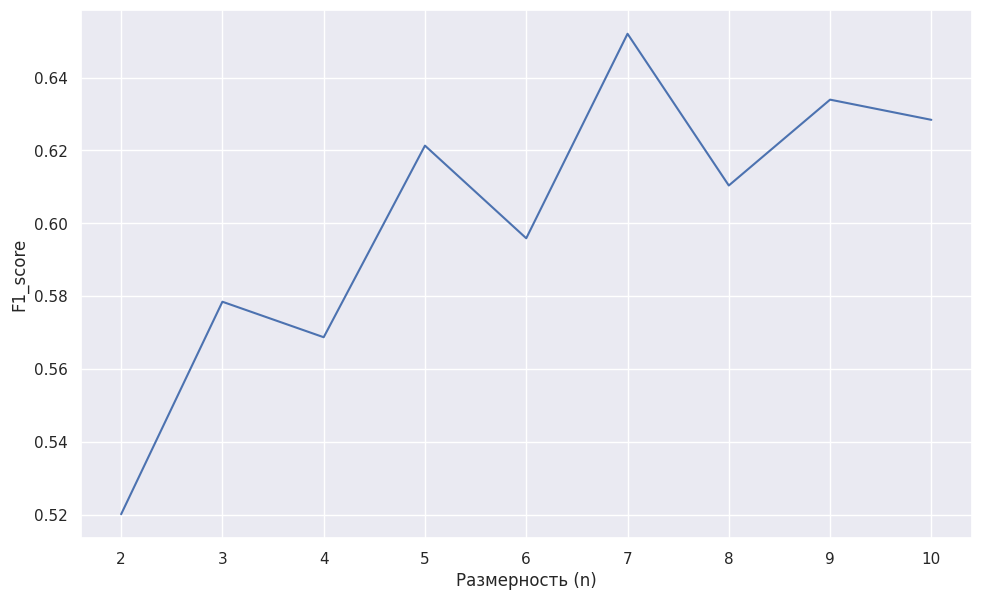

In [88]:
plt.figure(figsize=(11.5, 7), dpi=100)
sns.lineplot(data=df_differences, x="Размерность (n)", y="F1_score");

### Вывод: Наилучшение разбиение размерности при n = 7